In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from matplotlib import pyplot as plt
import numpy as np

In [5]:
from IPython.display import Image

In [6]:
import GPy

In [7]:
from incremental_run import Data, loadData, compute_several_stats, RunFullGP

new attribute for sparse GP!!


## create some data

In [8]:
kern = GPy.kern.RBF(input_dim = 2, variance = 1.1, lengthscale = 0.2, ARD = True)

In [9]:
lik = GPy.likelihoods.Gaussian(variance=0.01)

In [10]:
DD = Data(kern=kern, sig2_noise=0.01, Ntrain=2**12, Ntest=2**10, name='', UNIF=False, GRID=True)

76.5625% test data points IN
timeData  86.97133612632751


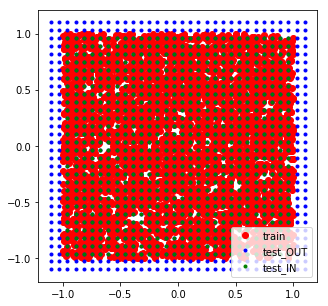

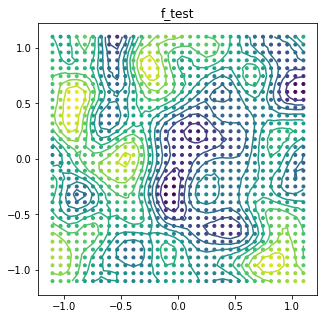

In [11]:
DD.plot_data(figsize=(10,6))

## run full GP as comparison

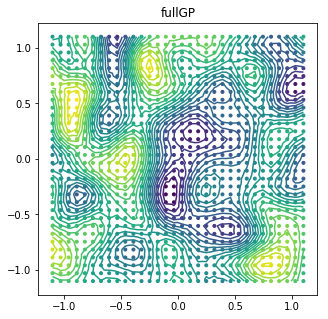

In [12]:
rFullGP = RunFullGP(DD, kern, likelihood=lik).run()
rFullGP.plot_full(figsize=(10,6))

In [13]:
DF = rFullGP.compute_stats()
DF

,time,lik,CRPS,errF,errAbs,negLogP,cov,CRPS_IN,errF_IN,errAbs_IN,negLogP_IN,cov_IN,CRPS_OUT,errF_OUT,errAbs_OUT,negLogP_OUT,cov_OUT
fullGP,5.308,3119.867,0.069,0.089,0.044,-2.255,0.952,0.058,0.024,0.019,-2.664,0.946,0.104,0.179,0.126,-0.92,0.971


## run Correlated Product of Experts (CPoE)

In [14]:
from CPoE import BlockGP

In [15]:
J = 32 # number of experts
C = 3 # degree of correlation

In [16]:
CPoE = BlockGP(kern, DD, lik)
CPoE.run0(J, C-1, sp=1, KDTREE=True, B_stop=int(DD.Ntrain/J), jit=1e-5) 
RES = CPoE.run_opt(False)

In [17]:
#compute some statistics wrt to full GP and true data
RES.compute_stats( rFullGP.m, rFullGP.v)

,time,lik,KLx1000,errFull,CRPS,errF,errAbs,negLogP,cov,KL_INx1000,...,errAbs_IN,negLogP_IN,cov_IN,KL_OUTx1000,errFull_OUT,CRPS_OUT,errF_OUT,errAbs_OUT,negLogP_OUT,cov_OUT
CPoE(3),3.209,3080.545,2.571,0.011,0.069,0.09,0.045,-2.244,0.951,2.314,...,0.02,-2.653,0.945,3.409,0.018,0.104,0.179,0.125,-0.91,0.971


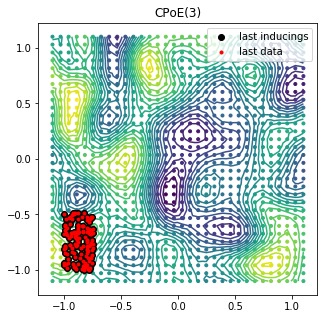

In [18]:
# show fit of CPoE
RES.plot_bgp()

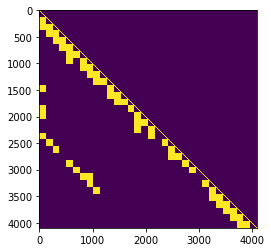

In [19]:
# show predecessor structure of matrix F
CPoE.compute_F()
plt.imshow( np.abs( CPoE.F ) > 1e-20 );